In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

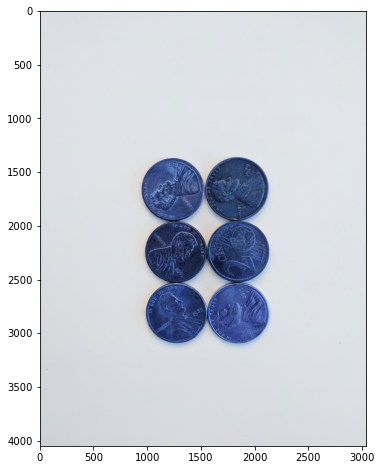

In [2]:
coins_image=cv2.imread("../Computer-Vision-with-Python/Data/pennies.jpg")
def showCoins(image,cmap=None):
    plt.figure(figsize=(12,8))
    plt.imshow(image,cmap=cmap)
showCoins(coins_image)

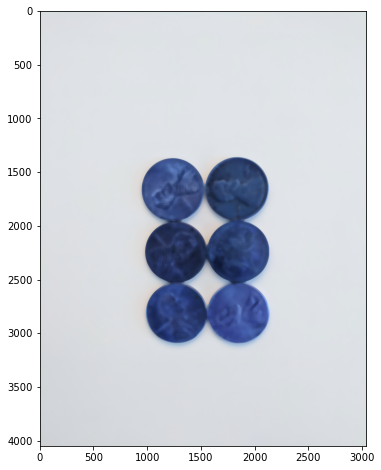

In [3]:
kernel=np.ones((5,5))
blurredImage=cv2.medianBlur(coins_image,35)
showCoins(blurredImage,"gray")

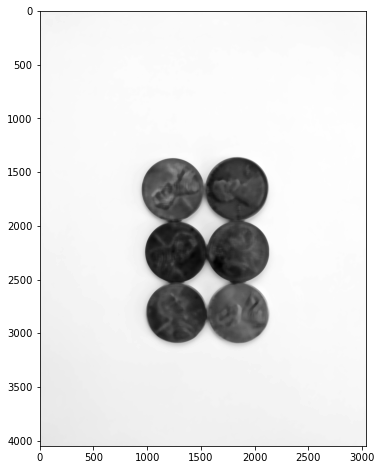

In [4]:
grayScaleImage=cv2.cvtColor(blurredImage,cv2.COLOR_BGR2GRAY)
showCoins(grayScaleImage,"gray")

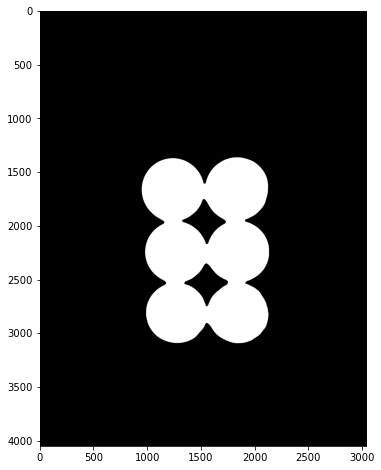

In [11]:
thresh,threshImage=cv2.threshold(grayScaleImage,150,255,cv2.THRESH_BINARY_INV)
showCoins(threshImage,cmap="gray")

In [12]:
contours,heirarchy=cv2.findContours(threshImage,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
len(contours)

3

In [14]:
copy_image=coins_image.copy()
for i in range(len(contours)):
    if heirarchy[0,i,3]==-1:
        cv2.drawContours(copy_image,contours,i,(255,0,0),10)

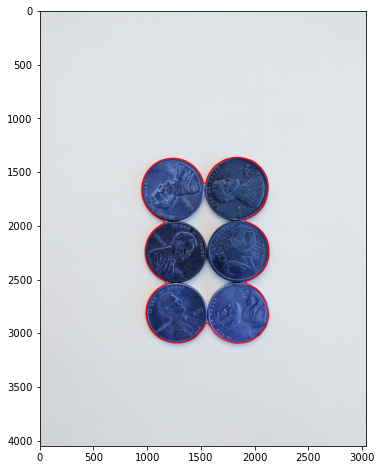

In [15]:
showCoins(copy_image,cmap="gray")

# Watershed Algorithm

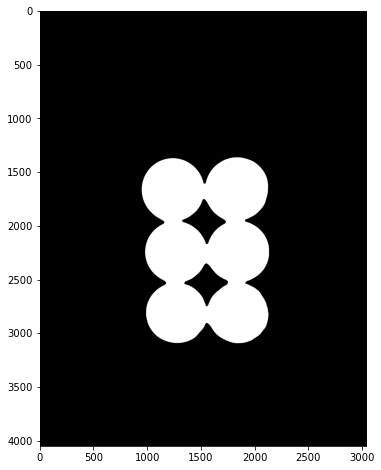

In [16]:
showCoins(threshImage,cmap="gray")

#### Remove noise (in this case it is not required)

In [17]:

kernel=np.zeros((3,3),np.uint8)
withoutNoise=cv2.morphologyEx(threshImage,cv2.MORPH_CLOSE,kernel,8)

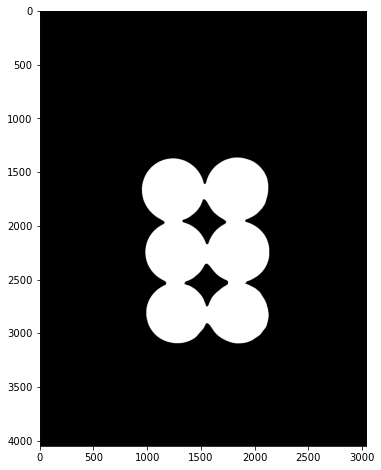

In [18]:
showCoins(withoutNoise,"gray")

#### Step 6: Grab Background that you are sure of

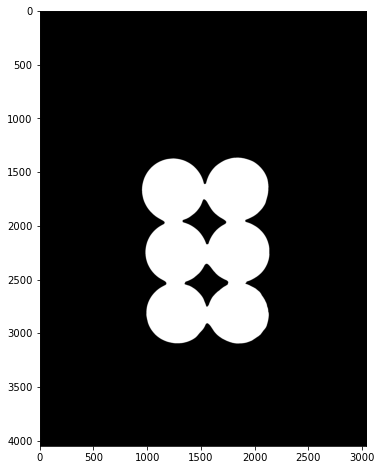

In [19]:
bg=cv2.dilate(withoutNoise,kernel,3)
showCoins(bg,"gray")

In [20]:
# Finding sure foreground area

In [21]:
distTransform=cv2.distanceTransform(withoutNoise,cv2.DIST_L2,5)
thresh,foregroundImage=cv2.threshold(distTransform,0.7*distTransform.max(),255,0)

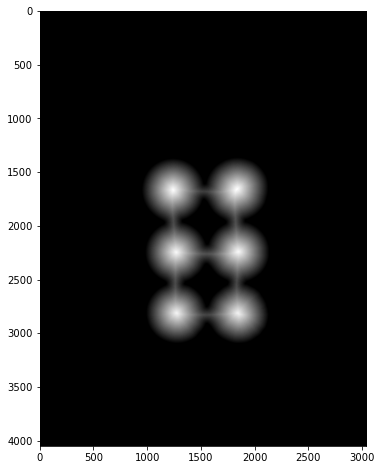

In [22]:
showCoins(distTransform,"gray")

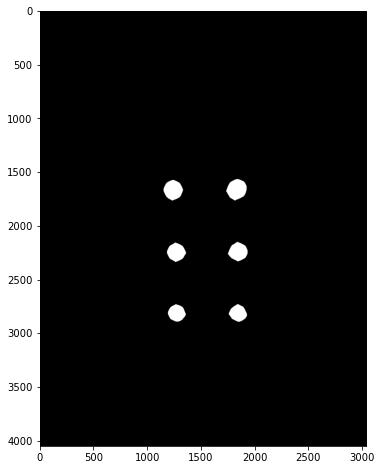

In [23]:
showCoins(foregroundImage,"gray")

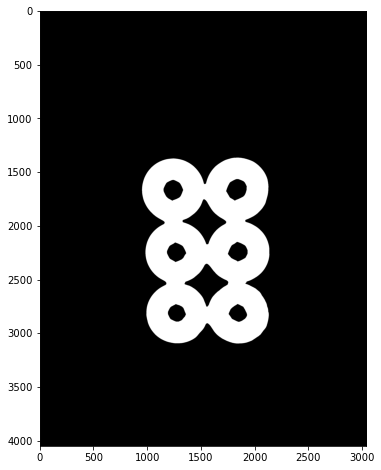

In [24]:
#Find Unknown region
unknown=bg-foregroundImage
showCoins(unknown,"gray")

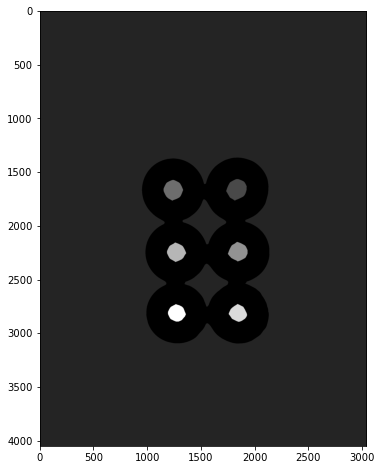

In [27]:
#  Label Markers of Sure Foreground
ret,markers=cv2.connectedComponents(np.uint8(foregroundImage))
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
showCoins(markers,"gray")

#### Step 10: Apply Watershed Algorithm to find Markers

In [28]:
markers=cv2.watershed(blurredImage,markers)

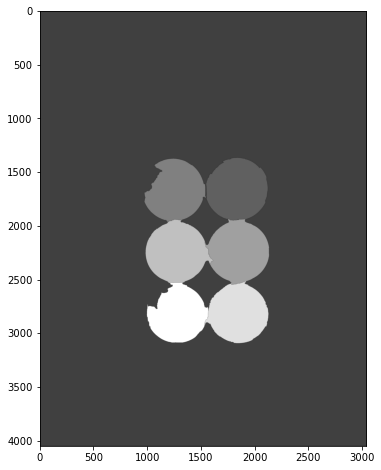

In [29]:
showCoins(markers,"gray")

In [30]:
contours,heirarchy=cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [31]:
copy_image=blurredImage.copy()
for i in range(len(contours)):
    if heirarchy[0,i,3]==-1:
        cv2.drawContours(copy_image,contours,i,(255,0,0),10)

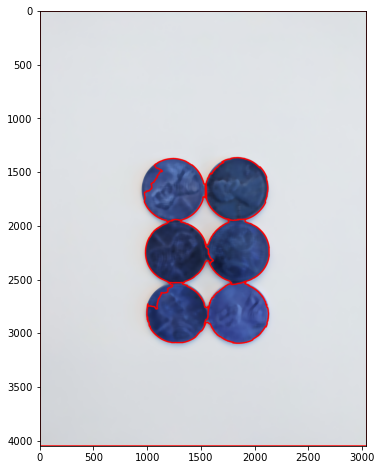

In [32]:
showCoins(copy_image,"gray")